In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Axes: xlabel='Sex', ylabel='count'>

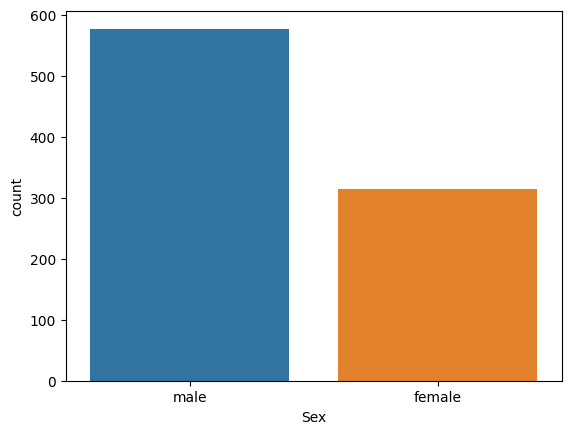

In [7]:
sns.countplot(data=df, x='Sex')

In [8]:
contagem = df.groupby('Pclass')['Survived'].sum()
contagem

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

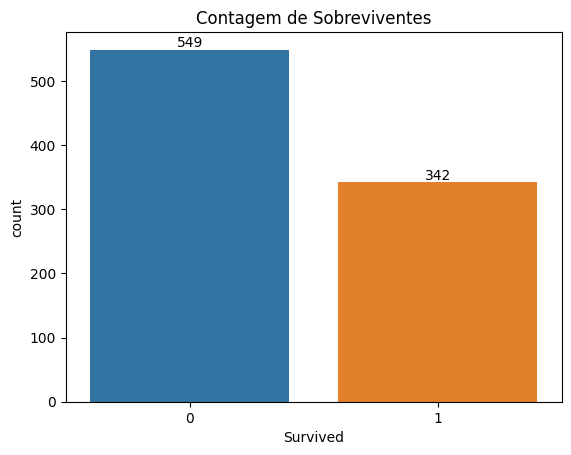

In [9]:
import matplotlib.pyplot as plt

contagem = df['Survived'].value_counts()

sns.countplot(x='Survived', data=df)

for i, count in enumerate(contagem):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Contagem de Sobreviventes')

plt.show()

<Axes: xlabel='Sex', ylabel='count'>

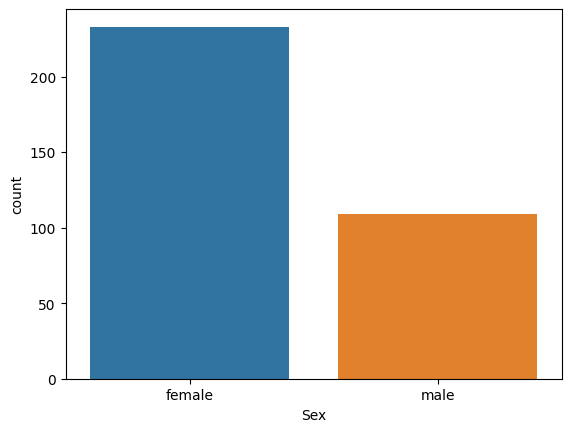

In [10]:
sobreviventes = df[df['Survived'] == 1]

contagem_genero = sobreviventes['Sex'].value_counts()

sns.countplot(x='Sex', data=sobreviventes)

<Axes: xlabel='Pclass', ylabel='count'>

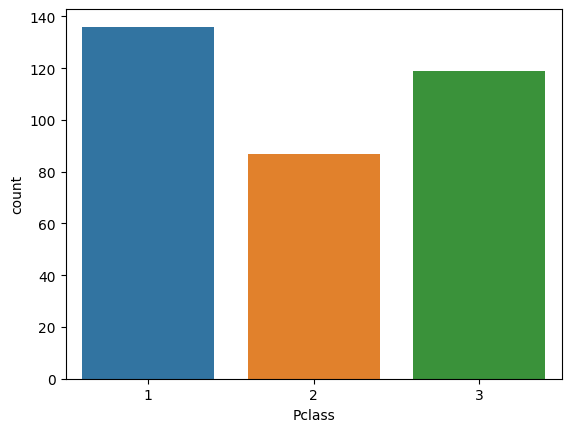

In [11]:
sobreviventes = df[df['Survived'] == 1]

contagem_sobreviventes_classe = sobreviventes['Pclass'].value_counts()

sns.countplot(x='Pclass', data=sobreviventes)

<Axes: xlabel='Age', ylabel='Density'>

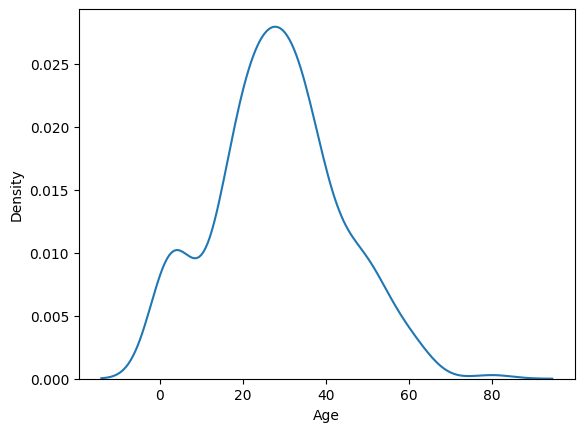

In [12]:
sobreviventes = df[df['Survived'] == 1]

contagem_genero = sobreviventes['Age'].value_counts()

sns.kdeplot(x='Age', data=sobreviventes)

In [ ]:
sobreviventesMediaIdade = sobreviventes['Age'].mean()
sobreviventesMediaIdade

28.343689655172415

In [13]:
naosobreviveu = df[df['Survived'] == 0]
naosobreviveuMediaIdade = naosobreviveu['Age'].mean()
naosobreviveuMediaIdade

30.62617924528302

<BarContainer object of 3 artists>

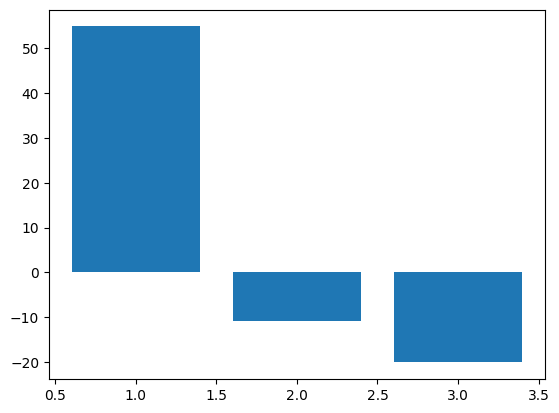

In [14]:
df['TarifaVariacao'] = df['Fare'].diff()
grupo_variacao = df.groupby('Pclass')['TarifaVariacao'].mean()
plt.bar(grupo_variacao.index, grupo_variacao.values)

In [15]:
contagem_total = df['Pclass'].value_counts()

porcentagem_sobreviventes = contagem_sobreviventes_classe / contagem_total * 100

porcentagem_sobreviventes

1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64

In [16]:
criancas = df[df['Age'] < 12]

In [17]:
criancas.sample(n=20, random_state=42, replace=False)
pd.concat([criancas,])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TarifaVariacao
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,-30.7875
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,-13.3708
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,13.1250
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,-14.4250
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,33.6834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,-19.4916
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4.2958
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,-57.8292
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C,7.4708


In [19]:
df = df.dropna(subset='Age')

In [21]:
y = df['Survived']
X = df[['Sex', 'Fare']]

In [22]:
X = pd.get_dummies(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
tree = DecisionTreeClassifier()

In [25]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
predict = tree.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.8111888111888111